## **Import libraries**

In [ ]:
import pandas as pd # Data manipulation
import numpy as np # Linear algebra
import warnings # Ignore warnings
import seaborn as sns #plots
import matplotlib.pyplot as plt # plots

In [ ]:
warnings.filterwarnings("ignore")

### **Load Data**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/insurance.csv")

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## **Data Visualization**

### **Unique Values**

In [ ]:
{col:list(df[col].unique()) for col in df.select_dtypes("object")}

{'region': ['southwest', 'southeast', 'northwest', 'northeast'],
 'sex': ['female', 'male'],
 'smoker': ['yes', 'no']}

In [ ]:


class Pie_plot():

  def __init__(self,serie,title,colors,explode):

    self.serie=serie
    self.title=title
    self.colors=colors
    self.explode=explode

  def pie(self):


    self.serie.plot(kind='pie',title=self.title, figsize=[20,8],
                     colors=self.colors,explode=self.explode,
          autopct=lambda p: '{:.2f}%({:.0f})'.format(p,(p/100)*self.serie.sum()))


class Pie_Option(Pie_plot):

  def option_plot(self,option):

    if option== "region":


      super().pie()


    elif option == "smoker":

      super().pie()

      
    elif option == "sex":

      super().pie()
    
    elif option == "children":

      super().pie()

In [ ]:
region_serie=df.groupby('region').size()
title="Region Percent"
colors=['#77dd77','#fdfd96','#84b6f4','#fdcae1']
explode= [0,0,0.1,0]

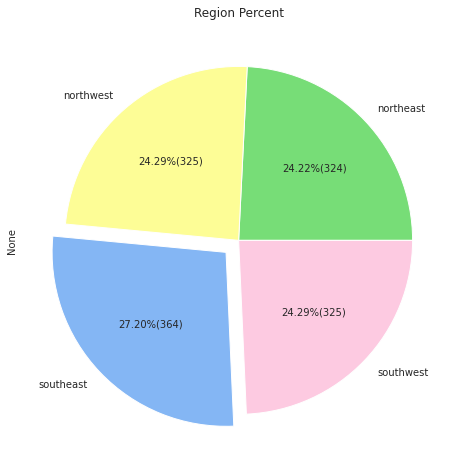

In [ ]:
region_pie=Pie_Option(region_serie,title,colors,explode)
region_pie.option_plot("region")

In [ ]:
smoker_serie=df.groupby('smoker').size()
title="Smoker Percent"
colors=['#77dd77','#ff6961']
explode=[0.1,0.01]

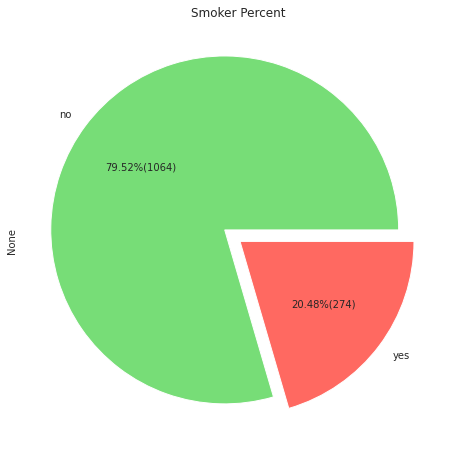

In [ ]:
smoker_pie=Pie_Option(smoker_serie,title,colors,explode)
smoker_pie.option_plot("smoker")

In [ ]:
sex_serie=df.groupby('sex').size()
title="Sex Percent"
colors=['#FFD1DC','#2271b3']
explode=[0,0]

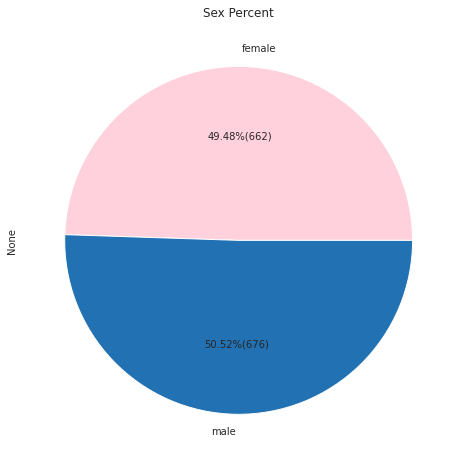

In [ ]:
smoker_pie=Pie_Option(sex_serie,title,colors,explode)
smoker_pie.option_plot("sex")

In [ ]:
children_serie=df.groupby('children').size()
title='Children Percent'
colors=['#b0f2c2','#fdfd96','#84b6f4','#fdcae1','#b0c2f2','#77dd77']
explode=[0.04,0,0,0,0,0]

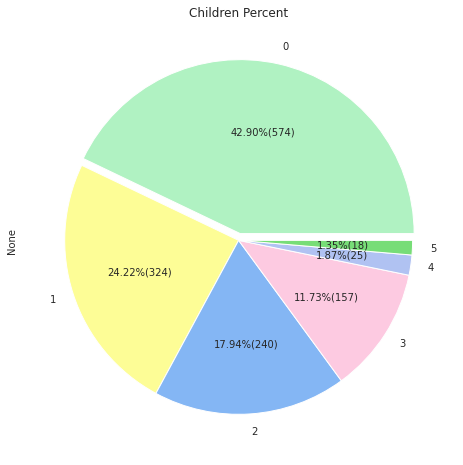

In [ ]:
children_pie=Pie_Option(children_serie,title,colors,explode)
children_pie.option_plot("children")

In [ ]:
sns.set_style(style="whitegrid")

In [ ]:
def histogram(feature,title):


  fig,ax=plt.subplots(1,1,figsize=(20,8))

  ax.set_title(title)
  ax.hist(df[feature],ec="k",color="#FADA5E",lw=3)


  ax.axvline(df[feature].mean(),
           color="red",
           linestyle="--",
           lw=3,label="Mean")


  ax.axvline(df[feature].median(),
           color="blue",
           linestyle="--",
           lw=3,label="Median")

  ax.legend()

  plt.show()

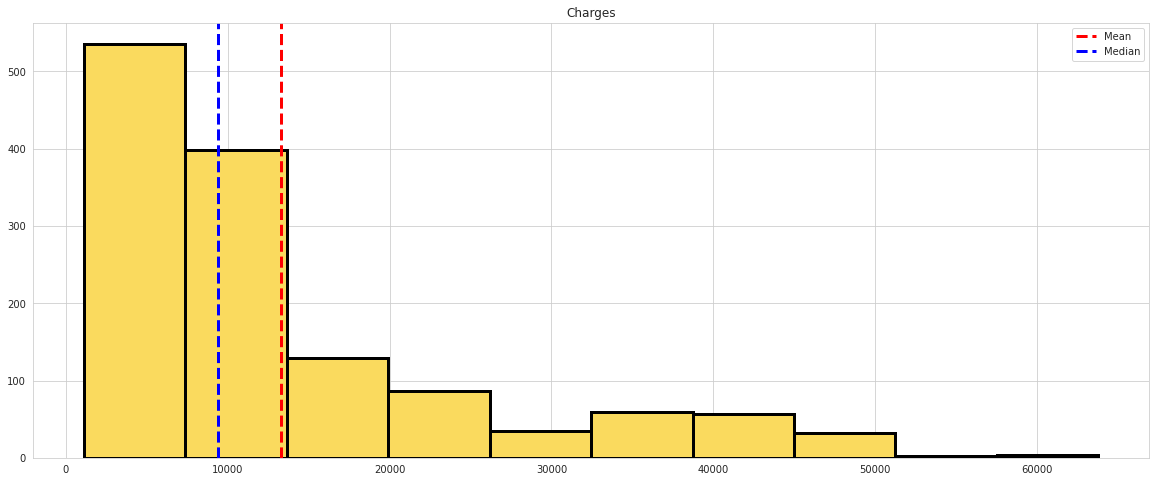

In [ ]:
histogram("charges","Charges")

In [ ]:
from plotnine import ggplot, aes, geom_point,geom_boxplot,labs,facet_wrap,scale_fill_manual,theme

### **The price of insurance is higher for people who smoke?**

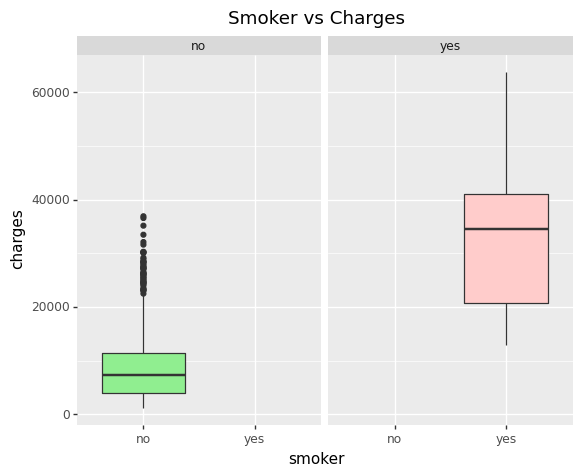

<ggplot: (8761356772321)>

In [ ]:



(
    
    ggplot(df)  
    + aes(x="smoker",y="charges",fill="smoker")  
    + geom_boxplot() + labs(title="Smoker vs Charges") 
    + facet_wrap("smoker")
    + theme(legend_position="none")
    +  scale_fill_manual(values=["#90ee90","#ffcccb"])
    
  

)



We observe a strong presence of outliers, for the category of non-smokers.

In [ ]:
df.groupby("smoker")["charges"].mean()

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

The average price of smokers is considerably much higher than non-smokers. Since smokers generally have a worse state of health and as a consequence the medical charge will be higher.

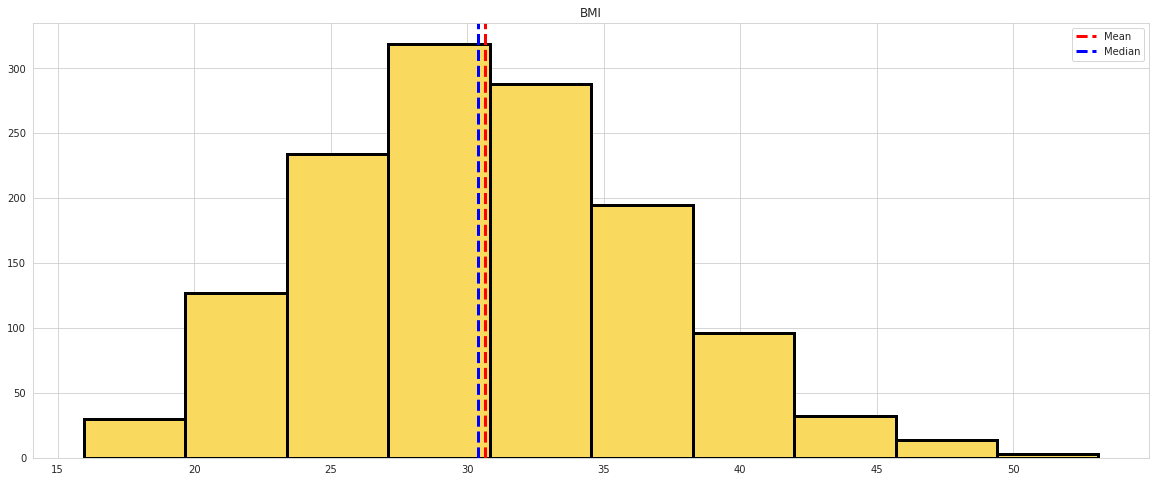

In [ ]:
histogram("bmi","BMI")

Most of the BMI data is within a normal distribution. But even so, it is possible to appreciate outlier values ​​in the upper range.

In [ ]:
from plotnine.facets import facet_grid

from plotnine.geoms import geom_smooth

def scatter_plots(feature,title):

  return((ggplot(df)  
    + aes(x=feature,y="charges",fill="smoker",alpha=0.1)  
    + geom_point() + labs(title=title,x=feature) 
    + facet_wrap("smoker")
    + theme(legend_position="none")
    +  scale_fill_manual(values=["#90ee90","#ffcccb"])
    + geom_smooth(method="lm")))
  

## **People with a high BMI the insurance charge is higher?**

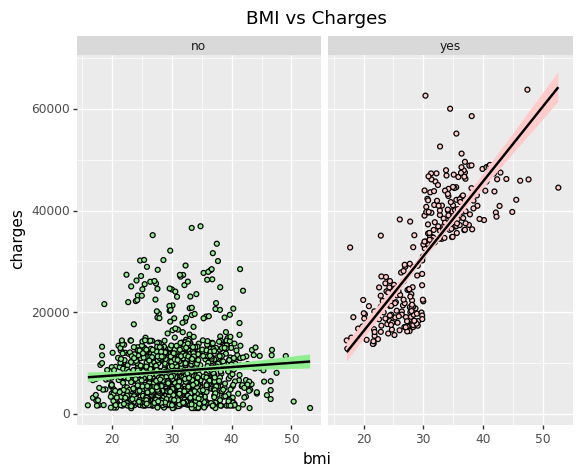

<ggplot: (8761335210917)>

In [ ]:
scatter_plots("bmi","BMI vs Charges")

* For non-smokers, the data trend remains constant. 
* While for smokers the trend line is linear, 
that is, one value increases proportionally with another.

## **Does age influence the price of insurance?**

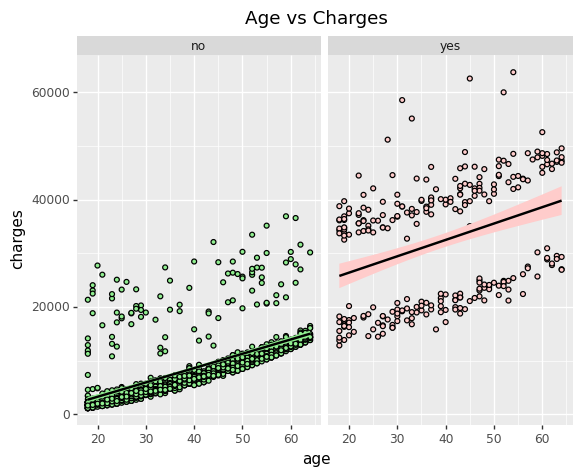

<ggplot: (8761335332541)>

In [ ]:
scatter_plots("age","Age vs Charges")

We observe 4 "clusters":


*   The first is for healthy people who do not smoke are healthy, as a consequence they do not have severe medical problems.
*   People who do not smoke but have significant health problems.

*  People who smoke but have a good health condition.
*   Users who smoke and have serious medical problems.

It can be simplified under two conditions. The first where the condition is not so serious and the second is when the case is dedicated.

We could create an additional feature, to be able to classify users based on the degree of health of the user. Since, as we can see in the graph, the quality of health influences the medical position.


In [ ]:
corr_pearson=df.corr(method="pearson")
corr_spearman=df.corr(method="spearman")

def correlation_matrix(corr_matrix):

  plt.figure(figsize=(16, 6))
  sns.heatmap(corr_matrix,annot=True)

  plt.show()

## **Correlation Matrix**

It is used to establish possible relationships between variables

### **Pearson**

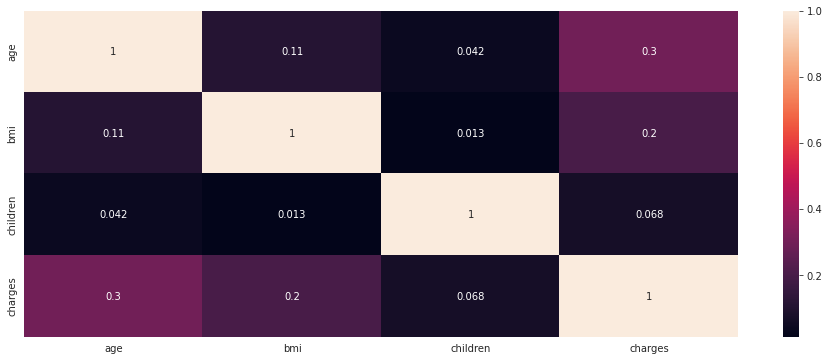

In [ ]:
correlation_matrix(corr_pearson)

### **Spearman**

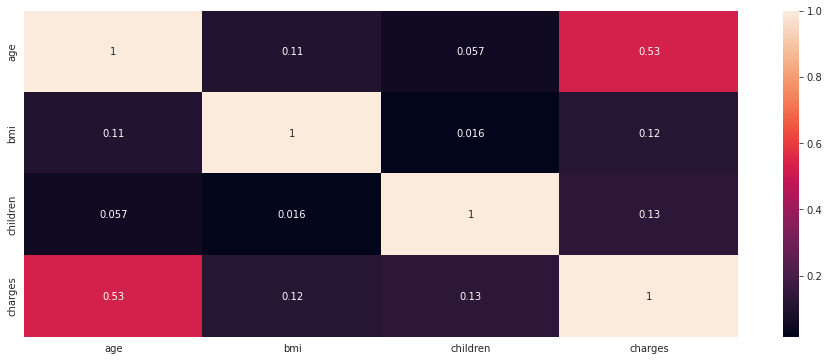

In [ ]:
correlation_matrix(corr_spearman)

The correlation is measured from 0 to 1 if it is positive. There does not appear to be a strong relationship between the variable of interest. It is still too early to start ruling out variables, since these variables can complement the predictions.

### **Conclusion**



* The variables that refer to describe some habits and characteristics of users influence the insurance charge.

* We discovered a new hidden characteristic in the dataset when comparing age with the price of insurance based on whether the user smokes or not, we could add another new variable to the problem that refers to the degree of the health problem.